In [254]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from statsmodels.api import qqplot
import scipy.stats as stats

from keras import models
from keras.layers import Dense, Dropout
from keras.utils import to_categorical

from pickle import dump

In [212]:
# loading the dataset
df = pd.read_csv("./data/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [214]:
df.oldpeak.unique()

array([2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0. , 0.5, 1.6, 1.2, 0.2, 1.8,
       1. , 2.6, 1.5, 3. , 2.4, 0.1, 1.9, 4.2, 1.1, 2. , 0.7, 0.3, 0.9,
       3.6, 3.1, 3.2, 2.5, 2.2, 2.8, 3.4, 6.2, 4. , 5.6, 2.9, 2.1, 3.8,
       4.4])

In [215]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [216]:
for i in df.columns:
    print(f"column {i} presents the following unique values : {df[i].unique()}\n ")

column age presents the following unique values : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
 
column sex presents the following unique values : [1 0]
 
column cp presents the following unique values : [3 2 1 0]
 
column trestbps presents the following unique values : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
 
column chol presents the following unique values : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 1

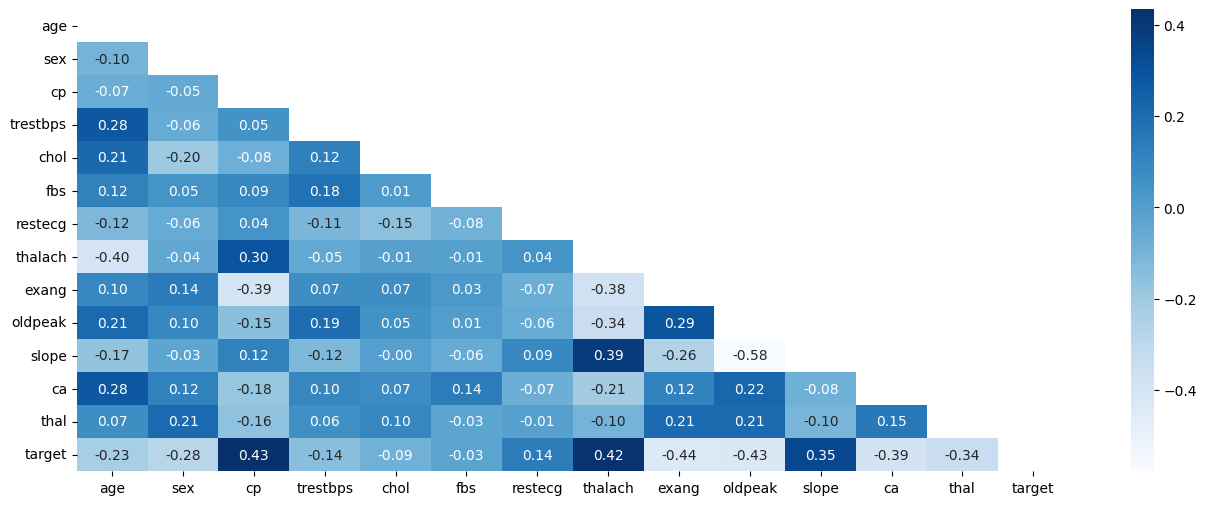

In [217]:
corr = df.corr()

plt.subplots(figsize = (16, 6))
mask = np.triu(np.ones_like(corr, dtype='bool'))
sns.heatmap(corr, annot = True, fmt = ".2f", cmap="Blues", mask = mask)
plt.show()

In [218]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [219]:
# splitting dataset

x = df.drop(['target'],axis=1)
y = df.target

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 1)


In [220]:
xtrain.shape, xtest.shape

((242, 13), (61, 13))

In [221]:
# scaling the dataset
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [222]:
xtrain

array([[-0.27090572,  0.6636838 ,  1.9766492 , ..., -0.66896473,
        -0.72428597, -2.11701865],
       [ 1.3708101 , -1.50674161,  0.99843017, ...,  0.96628239,
         0.27160724, -0.47497213],
       [ 0.27633288,  0.6636838 ,  0.99843017, ...,  0.96628239,
         0.27160724,  1.16707438],
       ...,
       [-2.78820331,  0.6636838 ,  0.02021114, ...,  0.96628239,
        -0.72428597, -0.47497213],
       [-0.38035344,  0.6636838 , -0.95800789, ...,  0.96628239,
        -0.72428597,  1.16707438],
       [-0.05201028,  0.6636838 ,  0.99843017, ...,  0.96628239,
        -0.72428597,  1.16707438]])

In [223]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

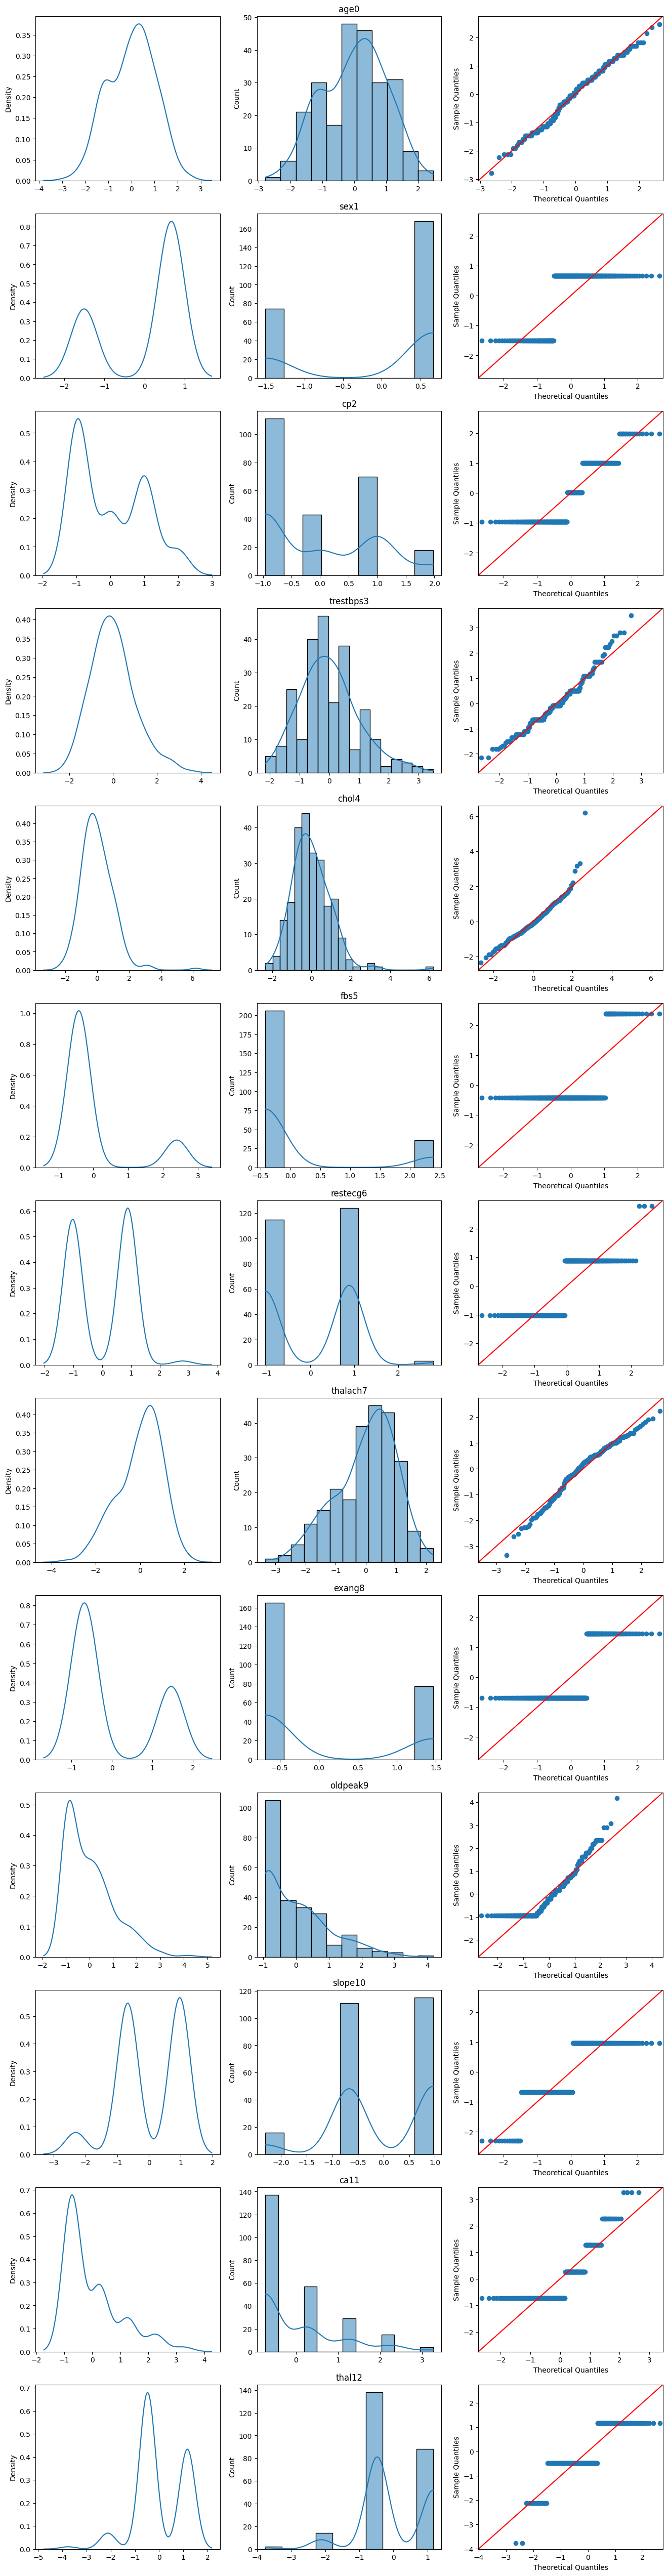

In [189]:
# looking for skewness

fig, ax = plt.subplots(nrows = 13, ncols=3, figsize = (16, 65))

for i in range(13):
    sns.kdeplot(xtrain[:, i], ax = ax[i][0])
    ax[i][1].set_title(df.columns[i] + f"{i}")
    sns.histplot(xtrain[:, i], ax = ax[i][1], kde=True)
    qqplot(xtrain[:, i], line = '45', fit = True, dist = stats.norm, ax=ax[i][2])

plt.show()

In [256]:
xtrain.shape

(242, 13)

In [237]:
# creating ANN model
model = models.Sequential() 
model.add(Dense(activation = "relu", input_dim = 13,  
                     units = 8, kernel_initializer = "uniform")) 
model.add(Dense(activation = "relu", units = 14,  
                     kernel_initializer = "uniform")) 
model.add(Dense(activation = "sigmoid", units = 1,  
                     kernel_initializer = "uniform")) 
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy',  
                   metrics = ['accuracy'] ) 

In [238]:
# tranining the model
model.fit(xtrain , ytrain , batch_size = 8 ,epochs = 100 ) 

Epoch 1/100
31/31 [==============================] - 5s 11ms/step - loss: 0.6924 - accuracy: 0.5537
Epoch 2/100
31/31 [==============================] - 0s 13ms/step - loss: 0.6868 - accuracy: 0.6157
Epoch 3/100
31/31 [==============================] - 0s 12ms/step - loss: 0.6626 - accuracy: 0.8140
Epoch 4/100
31/31 [==============================] - 0s 11ms/step - loss: 0.6002 - accuracy: 0.8388
Epoch 5/100
31/31 [==============================] - 0s 12ms/step - loss: 0.5109 - accuracy: 0.8471
Epoch 6/100
31/31 [==============================] - 1s 17ms/step - loss: 0.4323 - accuracy: 0.8471
Epoch 7/100
31/31 [==============================] - 0s 13ms/step - loss: 0.3805 - accuracy: 0.8595
Epoch 8/100
31/31 [==============================] - 0s 9ms/step - loss: 0.3475 - accuracy: 0.8760
Epoch 9/100
31/31 [==============================] - 0s 11ms/step - loss: 0.3277 - accuracy: 0.8760
Epoch 10/100
31/31 [==============================] - 0s 10ms/step - loss: 0.3150 - accuracy: 0.8719


In [250]:
ypred = model.predict(xtest)

2/2 [==============================] - 0s 16ms/step


In [251]:
# to show the numbers in float instead of scientific notation
np.set_printoptions(suppress=True)   

In [253]:
ypred

array([[0.00049537],
       [0.88701415],
       [0.01829181],
       [0.00246454],
       [0.00953951],
       [0.00113533],
       [0.01298318],
       [0.7776611 ],
       [0.00150712],
       [0.99999654],
       [0.16439953],
       [0.12422237],
       [0.9977377 ],
       [0.6617312 ],
       [0.2752582 ],
       [0.99974275],
       [0.9999754 ],
       [0.02093834],
       [0.843918  ],
       [0.8353905 ],
       [0.99987316],
       [0.01945043],
       [0.49499592],
       [0.9990556 ],
       [0.99998856],
       [0.9884891 ],
       [0.00190783],
       [0.9978463 ],
       [0.9180026 ],
       [0.999994  ],
       [0.99963176],
       [0.98595494],
       [0.9784591 ],
       [0.9986865 ],
       [0.01341222],
       [0.0884679 ],
       [0.04387462],
       [0.19626698],
       [0.7239452 ],
       [0.04619512],
       [0.99987495],
       [0.02744835],
       [0.10856026],
       [0.00024259],
       [0.97420084],
       [0.99992424],
       [0.10847872],
       [0.989

In [255]:
# dumping the scaler object
dump(scaler, open("./models_dump/heart_pred_models/scaler.pkl", 'wb'))

# dumping the ANN model
dump(model, open("./models_dump/heart_pred_models/model.pkl", 'wb'))